# DSCI 100 GROUP 15 PROPOSAL

### Hyunseok Jung, Jordan Sanders, Ivie Huang, Eden Vasica

The government of Canada provides historical data on weather and climate. Its' hourly weather data report consists of various climate observations such as temperature, humidity, and wind speed, as well as a column classifying the weather type (e.g. "Mostly Cloudy"). We are excited to test our ability to build a classification model for weather types based on climate observations from this dataset. To make our project more enjoyable and personal, we decided to work with historical weather and climate data provided by the 'Vancouver Intl A' weather station, which is not far from UBC. This facility, located in the Vancouver International Airport, is one of the most significant weather stations in Vancouver that collects measurements for weather forecasts and climate studies hourly. Unlike hourly data reports, daily and monthly data reports do not include a weather column making it impossible to build a classification model.

Considering seasonal climate differences and fluctuations, we decided to focus on weather reports from June, to reduce the number of external factors affecting the observations. As we will be handling an hourly data report, we have sufficient observations to build a classification model. In addition, to minimize the influence of global warming on temperature for our classification model, we will use recent data to train our model: June 2020 and June 2021. For the testing set, we will be using reports from June 2022, which will allow us to use the most recent weather data available to check the accuracy of our classification model.


## Preliminary exploratory data analysis

In order to demonstrate our project, we will download the June 1st, 2020, hourly data report from the Government of Canada website and load it. 

The dataset can be found from:
"https://climate.weather.gc.ca/climate_data/hourly_data_e.html?hlyRange=2013-06-11%7C2022-06-09&dlyRange=2013-06-13%7C2022-06-09&mlyRange=%7C&StationID=51442&Prov=BC&urlExtension=_e.html&searchType=stnName&optLimit=yearRange&StartYear=1840&EndYear=2022&selRowPerPage=25&Line=2&searchMethod=contains&txtStationName=Vancouver+intl&timeframe=1&time=LST&time=LST&Year=2020&Month=6&Day=1#"

**Disclaimer**:
For now, we have only loaded the dataset with observations made on Just 1st, 2020, for the purpose of demonstrating our project. However, in our actual project, the training set will include all hourly reports made in June 2020 and 2021. Then it will be combined into one dataset for our training set after tidying the data.

In [2]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
weather_training <- read_csv("data_proposal/en_climate_hourly_BC_1108395_06-2020_P1H.csv")
head(weather_training)

Parsed with column specification:
cols(
  .default = col_double(),
  `Station Name` = col_character(),
  `Date/Time (LST)` = col_datetime(format = ""),
  Month = col_character(),
  Day = col_character(),
  `Time (LST)` = col_time(format = ""),
  `Temp Flag` = col_logical(),
  `Dew Point Temp Flag` = col_logical(),
  `Rel Hum Flag` = col_logical(),
  `Precip. Amount (mm)` = col_logical(),
  `Precip. Amount Flag` = col_logical(),
  `Wind Dir Flag` = col_logical(),
  `Wind Spd Flag` = col_logical(),
  `Visibility Flag` = col_logical(),
  `Stn Press Flag` = col_logical(),
  `Hmdx Flag` = col_logical(),
  `Wind Chill` = col_logical(),
  `Wind Chill Flag` = col_logical(),
  Weather = col_character()
)

See spec(...) for full column specifications.



Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time (LST),Year,Month,Day,Time (LST),Temp (°C),⋯,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
<dbl>,<dbl>,<chr>,<dbl>,<dttm>,<dbl>,<chr>,<chr>,<time>,<dbl>,⋯,<lgl>,<dbl>,<lgl>,<dbl>,<lgl>,<dbl>,<lgl>,<lgl>,<lgl>,<chr>
-123.18,49.19,VANCOUVER INTL A,1108395,2020-06-01 00:00:00,2020,06,01,00:00:00,10.4,⋯,NA,32.2,NA,101.89,NA,NA,NA,NA,NA,NA
-123.18,49.19,VANCOUVER INTL A,1108395,2020-06-01 01:00:00,2020,06,01,01:00:00,9.1,⋯,NA,32.2,NA,101.90,NA,NA,NA,NA,NA,Mainly Clear
-123.18,49.19,VANCOUVER INTL A,1108395,2020-06-01 02:00:00,2020,06,01,02:00:00,8.9,⋯,NA,32.2,NA,101.91,NA,NA,NA,NA,NA,NA
-123.18,49.19,VANCOUVER INTL A,1108395,2020-06-01 03:00:00,2020,06,01,03:00:00,9.0,⋯,NA,32.2,NA,101.90,NA,NA,NA,NA,NA,NA
-123.18,49.19,VANCOUVER INTL A,1108395,2020-06-01 04:00:00,2020,06,01,04:00:00,8.8,⋯,NA,32.2,NA,101.90,NA,NA,NA,NA,NA,Mostly Cloudy
-123.18,49.19,VANCOUVER INTL A,1108395,2020-06-01 05:00:00,2020,06,01,05:00:00,8.9,⋯,NA,32.2,NA,101.94,NA,NA,NA,NA,NA,NA


##### Adding . in between column names for convenience.

In [4]:
colnames(weather_training) <- make.names(colnames(weather_training))
colnames(weather_training)

[1] "Longitude..x."       "Latitude..y."        "Station.Name"       
 [4] "Climate.ID"          "Date.Time..LST."     "Year"               
 [7] "Month"               "Day"                 "Time..LST."         
[10] "Temp...C."           "Temp.Flag"           "Dew.Point.Temp...C."
[13] "Dew.Point.Temp.Flag" "Rel.Hum...."         "Rel.Hum.Flag"       
[16] "Precip..Amount..mm." "Precip..Amount.Flag" "Wind.Dir..10s.deg." 
[19] "Wind.Dir.Flag"       "Wind.Spd..km.h."     "Wind.Spd.Flag"      
[22] "Visibility..km."     "Visibility.Flag"     "Stn.Press..kPa."    
[25] "Stn.Press.Flag"      "Hmdx"                "Hmdx.Flag"          
[28] "Wind.Chill"          "Wind.Chill.Flag"     "Weather"

##### Selecting only the predictors (temperature(°C), humidity(%), wind speed(km/h), visibility(km), pressure(kPa)) and Weather for class.
##### Filtering out NA values in Weather column

In [5]:
tidy_weather_training <- weather_training %>%
    select(Temp...C., Rel.Hum...., Wind.Spd..km.h., Visibility..km., Stn.Press..kPa., Weather) %>%
    filter(Weather != "NA") 
head(tidy_weather_training)

Temp...C.,Rel.Hum....,Wind.Spd..km.h.,Visibility..km.,Stn.Press..kPa.,Weather
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
9.1,86,10,32.2,101.90,Mainly Clear
8.8,85,5,32.2,101.90,Mostly Cloudy
11.9,75,8,32.2,102.03,Mostly Cloudy
15.2,67,10,32.2,102.11,Mainly Clear
16.2,69,18,32.2,102.13,Mainly Clear
18.0,53,13,32.2,102.12,Clear


##### Renaming columns for convenience

In [6]:
tidy_weather_training <- rename(tidy_weather_training,
       Temp = Temp...C., 
       Humid = Rel.Hum...., 
       Wind_Spd = Wind.Spd..km.h.,
       Vis = Visibility..km., 
       Press = Stn.Press..kPa.)
head(tidy_weather_training)

Temp,Humid,Wind_Spd,Vis,Press,Weather
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
9.1,86,10,32.2,101.90,Mainly Clear
8.8,85,5,32.2,101.90,Mostly Cloudy
11.9,75,8,32.2,102.03,Mostly Cloudy
15.2,67,10,32.2,102.11,Mainly Clear
16.2,69,18,32.2,102.13,Mainly Clear
18.0,53,13,32.2,102.12,Clear


##### Mutating weather column as factor

In [7]:
tidy_weather_training <- tidy_weather_training %>%
    mutate(Weather = as_factor(Weather))

##### Now we have tidy data that is ready to be used as our training set for our classification model below. However, there is one last thing to check

In [8]:
head(tidy_weather_training)

Temp,Humid,Wind_Spd,Vis,Press,Weather
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
9.1,86,10,32.2,101.90,Mainly Clear
8.8,85,5,32.2,101.90,Mostly Cloudy
11.9,75,8,32.2,102.03,Mostly Cloudy
15.2,67,10,32.2,102.11,Mainly Clear
16.2,69,18,32.2,102.13,Mainly Clear
18.0,53,13,32.2,102.12,Clear


##### Examining the proportion of different labels in the Weather column to identify potential class imbalance since the K-nearest neighbor algorithm is more likely to pick the label that is more common.

`summarise()` ungrouping output (override with `.groups` argument)



Weather,count,percentage
<fct>,<int>,<dbl>
Mainly Clear,48,16.5517241
Mostly Cloudy,99,34.1379310
Clear,14,4.8275862
Rain,48,16.5517241
"Rain,Fog",14,4.8275862
"Moderate Rain,Fog",5,1.7241379
Cloudy,45,15.5172414
Rain Showers,8,2.7586207
"Thunderstorms,Rain Showers",1,0.3448276


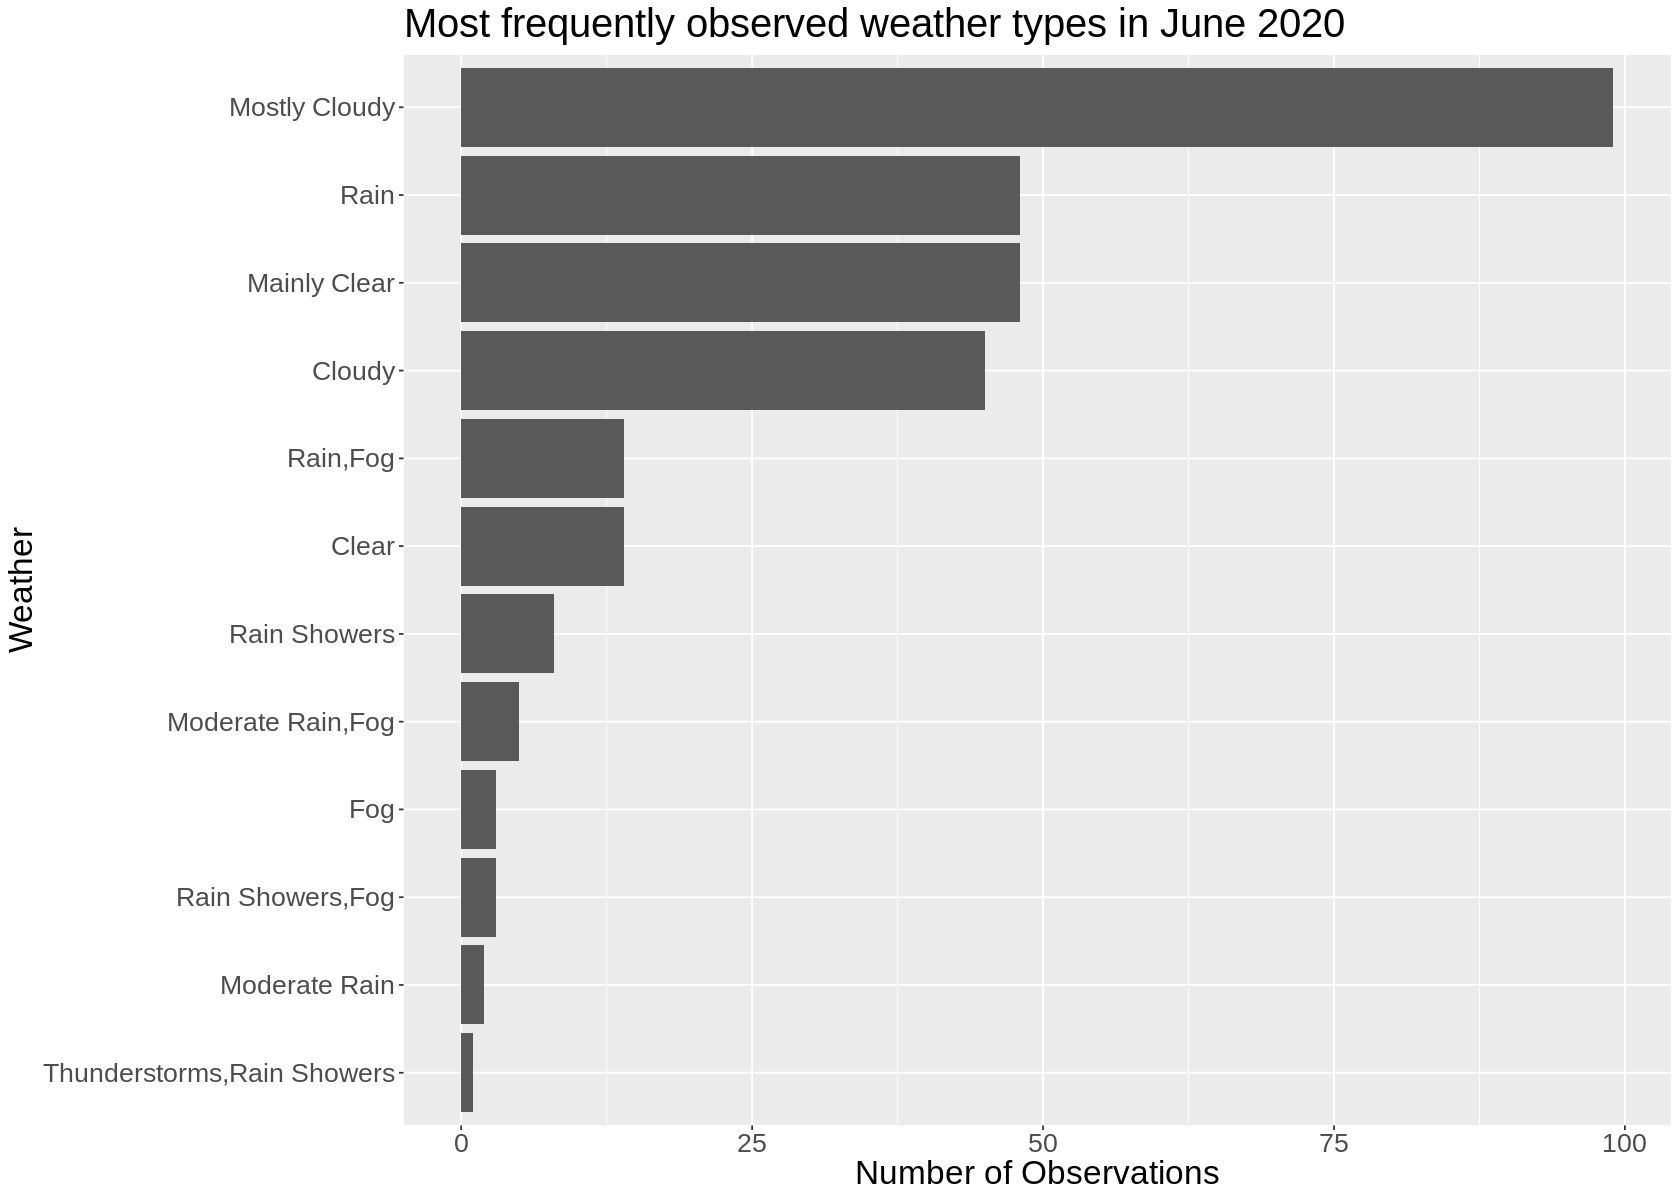

In [57]:
num_obs <- nrow(tidy_weather_training)
summary <-tidy_weather_training %>%
    group_by(Weather) %>%
    summarize(count = n(),
              percentage = n() / num_obs * 100)
summary

library(repr)
options(repr.plot.width = 14, repr.plot.height = 10)
plot <- ggplot(summary, aes(x = count, y = reorder(Weather, count,))) +
    geom_bar(stat = "identity") +
    labs(x = "Number of Observations", y = "Weather", title = "Most frequently observed weather types in June 2020") +
    theme(text = element_text(size=20)) 
plot

Right now, the dataset has an overrepresentation of the "Mostly Cloudy" category in the weather column. However, this is anticipated to be less of a problem if we combine all the observations from June 2020 and 2021 since the weather varies day to day. On the other hand, it is also possible that this trend may get amplified due to the climate patterns of Vancouver. For instance, June could be a cloudy month in general. If this is the case, we will be adding an oversampling step to the `recipe` that we will make for our classification model with the `step_upsample` function from the `themis` R Package to solve the imbalance problem.

## Methods 
1. Download all June 2020 and 2021 hourly data from the government of Canada website and tidy it like above and combine it into one dataframe and call it `training_set`.
2. Repeat the same process for June 2022 hourly data and call it `testing_set`.
4. Create a recipe that uses all predictors and a model specification with tuning on the number of neighbours using `tune()`. Also Use the `step_scale(all_predictors())` function and the `step_center(all_predictors())` function to scale and center our data. While using `step_upsample` function to solve class imbalance if necessary.
5. Perform a 5-fold cross-validation on the training set using `vfold_cv` function
6. Create a workflow analysis with our recipe and model specification using `workflow()` function
7. Collect the metrics from the workflow analysis using the `collect_metrics` function.
8. Plot the $k$ vs the accuracy and identify which $k$ the most optimal for our data set for k-nn classification. 
9. Create a new model specification for with the identified best value $k$ using the `nearest_neighbor()` function.
10. Train the classifier with the training data set using the `workflow` function. Instead of using `fit` or `fit_resamples`, we will use the `tune_grid` function to fit the model for each value in a range of parameter values. For the `resamples` argument, we will input the cross-validation model we created earlier.
11. Use our final model to predict on the test dataset `testing_set`
12. Record the accuracy of this prediction, and store this in an object
13. Plot the accuracy of our model on a bar graph for each category of Weather column

## Expected Outcomes and Significance

We expect that our final trained model, using data from June 2020 and June 2021, will allow us to predict the weather on our test dataset using data from June 2022. If our model is accurate to a high degree, it would be beneficial to fill in missing weather information providing more data points for future studies. Additionally, our findings may aid in creating more complex models such as those used to predict future weather. Our findings may also foster further questions regarding the role and significance of our predictor variables in causing different weather types. If our model does not accurately predict the weather, it may lead to more questions about why weather types are changing in similar conditions as a result of climate change.